# Alpha Shape Toolbox
## Install Dependencies

In [ ]:
import os
import sys
!conda install --yes --prefix {sys.prefix} descartes matplotlib shapely  # Conda Install
# !{sys.executable} -m pip install descartes matplotlib shapely  # Pip Install

## Import Dependencies

In [1]:
import os
import sys
from descartes import PolygonPatch
import matplotlib.pyplot as plt

notebook_dir = os.getcwd()
sys.path.insert(0, os.path.dirname(notebook_dir))
import alphashape

## Define a set of points

In [2]:
points = [(0., 0.), (0., 1.), (1., 1.), (1., 0.),
          (0.5, 0.25), (0.5, 0.75), (0.25, 0.5), (0.75, 0.5)]

## Plotting the input points

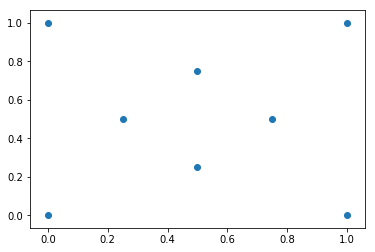

In [3]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points))
plt.show()

## Generate an Alpha Shape ($\alpha=0.$) (Convex Hull)
Every convex hull is an alpha shape, but not every alpha shape is a convex hull.  When the `alphashape` function is called with an alpha parameter of 0, a convex hull will always be returned.  Plotting the convex hull is similar to if you wrapped a rubber band around pegs on a board.

### Create the alpha shape

In [4]:
alpha_shape = alphashape.alphashape(points, 0.)

### Plotting the alpha shape over the input data

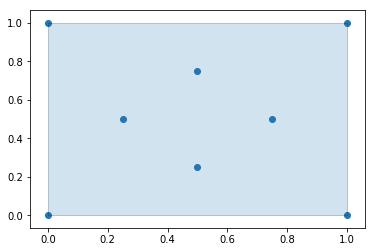

In [5]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

## Generate an Alpha Shape ($\alpha=2.0$) (Concave Hull)
When a convex hull does not result in a tight enough fit of the bounding shape to the data, we can use the alpha shape library to clip out periferal triangles from the convex hull.  As we increase the alpha parameter value, the bounding shape will begin to fit the sample data with a more tightly fitting bounding box as shown in the example below.

### Create the alpha shape

In [6]:
alpha_shape = alphashape.alphashape(points, 2.0)

### Plotting the alpha shape over the input data

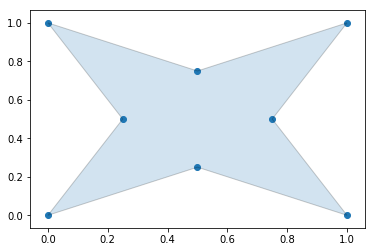

In [7]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

## Generate an Alpha Shape ($\alpha=3.5$)
If you go too high on the alpha parameter, you will start to lose points from the original data set.  As shown in this selection of an alpha parameter, the outermost points are dropped from the generated bounding box.

### Create the alpha shape

In [8]:
alpha_shape = alphashape.alphashape(points, 3.5)

### Plotting the alpha shape over the input data

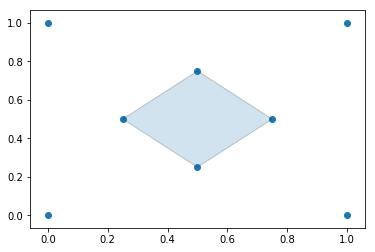

In [9]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

## Generate an Alpha Shape ($\alpha=5.0$)
If you go too far, you will lose everything.

In [10]:
alpha_shape = alphashape.alphashape(points, 5.0)
print(alpha_shape)

GEOMETRYCOLLECTION EMPTY
